In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('./train.csv')

In [3]:
trainOHE = pd.get_dummies(train)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
validation_set, train_set = train_test_split(trainOHE, test_size=.8)
print('Size of train set: {}'.format(len(train_set)))
print('Size of validation set: {}'.format(len(validation_set)))

Size of train set: 150655
Size of validation set: 37663


In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
from sklearn.linear_model import Ridge, Lasso

In [8]:
trainStd_X = trainOHE.ix[:,np.logical_and(trainOHE.columns!='id', trainOHE.columns!='loss')]
train_y = trainOHE.ix[:,trainOHE.columns=='loss']
validation_std_X = validation_set.ix[:,np.logical_and(trainOHE.columns!='id', trainOHE.columns!='loss')]
validation_y = validation_set.ix[:,trainOHE.columns=='loss']

In [9]:
coefs = []
errors_train = []
errors_validation = []
alphas = np.array([10e-10,10e-9,10e-8,10e-7,10e-6,10e-5,10e-4,10e-3,10e-2,10e-1,10e-0,10e1,10e2,10e3])
for alpha in tqdm_notebook(alphas):
    lasso = Lasso(alpha=alpha)
    lasso.fit(validation_std_X, validation_y)
    coefs.append(lasso.coef_)
    errors_train.append(mean_squared_error(train_y, lasso.predict(trainStd_X)))
    errors_validation.append(mean_squared_error(validation_y, lasso.predict(validation_std_X)))

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

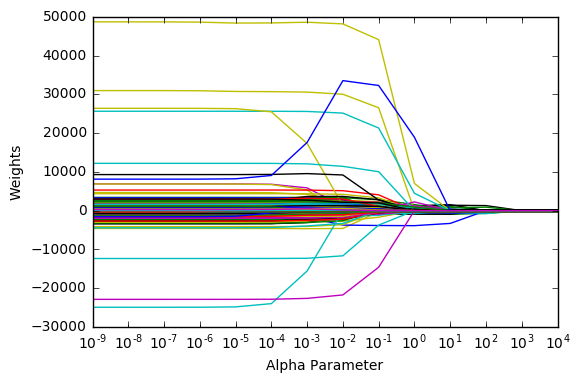

In [14]:
plt.semilogx(alphas, coefs)
plt.xlabel('Alpha Parameter')
plt.ylabel('Weights')
plt.show()

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

In [58]:
def scorer(estimator, X, y_true):
    prediction = estimator.predict(X)
    error = abs(prediction - y_true)
    return (sum(error) / error.size)

In [67]:
scoring = make_scorer(mean_absolute_error)

In [42]:
param_grid = {'max_depth': [2,5,7,10,15,20]}

In [68]:
gs = GridSearchCV(RandomForestRegressor(), cv=3,
                  n_jobs = -2,
                  param_grid=param_grid, verbose=3,
                  scoring=scoring)
gs

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-2,
       param_grid={'max_depth': [2, 5, 7, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_absolute_error), verbose=3)

In [44]:
train_y = train_y.squeeze()

In [69]:
%%time
gs.fit(trainStd_X, train_y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=1568.262475 -   1.4s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=2, score=1569.924428 -   1.1s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=2, score=1574.056286 -   1.2s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=1438.716892 -   1.1s
[CV] max_depth=7 .....................................................
[CV] ......................... max_depth=5, score=1439.347970 -   1.2s
[CV] max_depth=7 .....................................................
[CV] ............

[Parallel(n_jobs=-2)]: Done  18 out of  18 | elapsed: 324.0min finished


CPU times: user 31 s, sys: 3.03 s, total: 34 s
Wall time: 5h 24min 27s


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-2,
       param_grid={'max_depth': [2, 5, 7, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_absolute_error), verbose=3)

In [74]:
gs.cv_results_

{'mean_fit_time': array([    28.38445807,     68.81102125,  18746.56815505,    126.89685098,
           190.64959836,    251.72235672]),
 'mean_score_time': array([ 1.23350128,  1.17492   ,  0.98157231,  1.53076021,  1.41200264,
         1.21325994]),
 'mean_test_score': array([ 1570.74773395,  1440.70763854,  1387.71126448,  1325.27919613,
         1280.99242864,  1275.60756422]),
 'mean_train_score': array([ 1570.62043502,  1434.95488922,  1373.13452965,  1275.79561133,
         1092.0270086 ,   900.06385361]),
 'param_max_depth': masked_array(data = [2 5 7 10 15 20],
              mask = [False False False False False False],
        fill_value = ?),
 'params': ({'max_depth': 2},
  {'max_depth': 5},
  {'max_depth': 7},
  {'max_depth': 10},
  {'max_depth': 15},
  {'max_depth': 20}),
 'rank_test_score': array([1, 2, 3, 4, 5, 6], dtype=int32),
 'split0_test_score': array([ 1568.2624749 ,  1438.71689158,  1384.40861705,  1325.80090244,
         1282.40480925,  1277.65202549]),
 'split0_

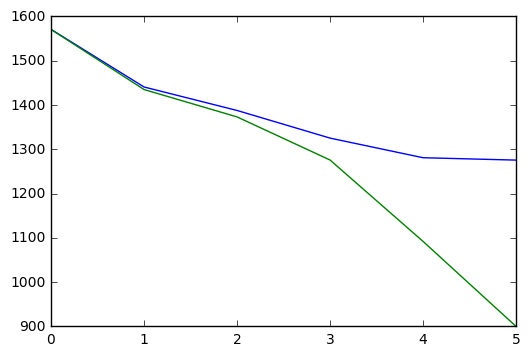

In [77]:
plt.plot(gs.cv_results_['mean_test_score'])
plt.plot(gs.cv_results_['mean_train_score'])

In [142]:
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.linear_model import RandomizedLasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

In [153]:
pipeline = Pipeline(steps=[('regularization', SelectFromModel(Lasso())), 
                                ('random_forest', RandomForestRegressor())])

# parameters
alphas = np.logspace(-6,1,num=100)
depth = stats.randint(low=5, high=30)

#param dict
param_distribution = {'regularization__estimator__alpha': alphas,
                      'random_forest__max_depth':depth}

In [155]:
randSearch = RandomizedSearchCV(pipeline,param_distributions=param_distribution,
                                verbose=3,n_iter=100,scoring=scoring,n_jobs=-2)

In [156]:
randSearch.fit(trainStd_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] regularization__estimator__alpha=0.869749002618, random_forest__max_depth=21 
[CV] regularization__estimator__alpha=0.869749002618, random_forest__max_depth=21 
[CV] regularization__estimator__alpha=0.869749002618, random_forest__max_depth=21 
[CV]  regularization__estimator__alpha=0.869749002618, random_forest__max_depth=21, score=1283.248062 -   2.9s
[CV] regularization__estimator__alpha=6.89261210435e-05, random_forest__max_depth=28 
[CV]  regularization__estimator__alpha=0.869749002618, random_forest__max_depth=21, score=1282.623805 -   1.9s
[CV] regularization__estimator__alpha=6.89261210435e-05, random_forest__max_depth=28 
[CV]  regularization__estimator__alpha=0.869749002618, random_forest__max_depth=21, score=1274.930243 -   2.8s
[CV] regularization__estimator__alpha=6.89261210435e-05, random_forest__max_depth=28 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=6.89261210435e-05, random_forest__max_depth=28, score=1287.098376 -   2.6s
[CV] regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=13 
[CV]  regularization__estimator__alpha=6.89261210435e-05, random_forest__max_depth=28, score=1286.309097 -   3.2s
[CV] regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=13 
[CV]  regularization__estimator__alpha=6.89261210435e-05, random_forest__max_depth=28, score=1282.749683 -   4.8s
[CV] regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=13 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=13, score=1292.075830 -   1.7s
[CV] regularization__estimator__alpha=3.05385550883e-05, random_forest__max_depth=16 
[CV]  regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=13, score=1294.400503 -   2.2s
[CV] regularization__estimator__alpha=3.05385550883e-05, random_forest__max_depth=16 
[CV]  regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=13, score=1294.398998 -   3.3s
[CV] regularization__estimator__alpha=3.05385550883e-05, random_forest__max_depth=16 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=3.05385550883e-05, random_forest__max_depth=16, score=1279.534840 -   1.9s
[CV] regularization__estimator__alpha=0.0642807311728, random_forest__max_depth=26 
[CV]  regularization__estimator__alpha=3.05385550883e-05, random_forest__max_depth=16, score=1278.417569 -   2.4s
[CV] regularization__estimator__alpha=0.0642807311728, random_forest__max_depth=26 
[CV]  regularization__estimator__alpha=3.05385550883e-05, random_forest__max_depth=16, score=1278.959885 -   3.3s
[CV] regularization__estimator__alpha=0.0642807311728, random_forest__max_depth=26 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.0642807311728, random_forest__max_depth=26, score=1280.444994 -   2.4s
[CV] regularization__estimator__alpha=0.869749002618, random_forest__max_depth=14 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.0642807311728, random_forest__max_depth=26, score=1282.905630 -   2.4s
[CV] regularization__estimator__alpha=0.869749002618, random_forest__max_depth=14 
[CV]  regularization__estimator__alpha=0.869749002618, random_forest__max_depth=14, score=1284.295522 -   1.3s
[CV] regularization__estimator__alpha=0.869749002618, random_forest__max_depth=14 
[CV]  regularization__estimator__alpha=0.0642807311728, random_forest__max_depth=26, score=1279.757311 -   2.3s
[CV] regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=9 
[CV]  regularization__estimator__alpha=0.869749002618, random_forest__max_depth=14, score=1278.692526 -   1.9s
[CV] regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=9 
[CV]  regularization__estimator__alpha=0.869749002618, random_forest__max_depth=14, score=1286.316046 -   1.8s
[CV] regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=9 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=9, score=1335.806305 -   2.0s
[CV] regularization__estimator__alpha=1.91791026167e-06, random_forest__max_depth=9 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=9, score=1340.320870 -   2.1s
[CV] regularization__estimator__alpha=1.91791026167e-06, random_forest__max_depth=9 
[CV]  regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=9, score=1347.845291 -   2.7s
[CV] regularization__estimator__alpha=1.91791026167e-06, random_forest__max_depth=9 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=1.91791026167e-06, random_forest__max_depth=9, score=1341.456318 -   2.2s
[CV] regularization__estimator__alpha=3.1992671378, random_forest__max_depth=23 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=1.91791026167e-06, random_forest__max_depth=9, score=1336.764581 -   1.6s
[CV] regularization__estimator__alpha=3.1992671378, random_forest__max_depth=23 
[CV]  regularization__estimator__alpha=3.1992671378, random_forest__max_depth=23, score=1284.947832 -   1.1s
[CV] regularization__estimator__alpha=3.1992671378, random_forest__max_depth=23 
[CV]  regularization__estimator__alpha=1.91791026167e-06, random_forest__max_depth=9, score=1347.230669 -   1.5s
[CV] regularization__estimator__alpha=0.00247707635599, random_forest__max_depth=26 
[CV]  regularization__estimator__alpha=3.1992671378, random_forest__max_depth=23, score=1288.033800 -   1.6s
[CV] regularization__estimator__alpha=0.00247707635599, random_forest__max_depth=26 


[Parallel(n_jobs=-2)]: Done  26 tasks      | elapsed: 157.8min


[CV]  regularization__estimator__alpha=3.1992671378, random_forest__max_depth=23, score=1287.196239 -   3.6s
[CV] regularization__estimator__alpha=0.00247707635599, random_forest__max_depth=26 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.00247707635599, random_forest__max_depth=26, score=1283.391301 -   1.9s
[CV] regularization__estimator__alpha=0.327454916288, random_forest__max_depth=12 
[CV]  regularization__estimator__alpha=0.00247707635599, random_forest__max_depth=26, score=1282.908368 -   2.8s
[CV] regularization__estimator__alpha=0.327454916288, random_forest__max_depth=12 
[CV]  regularization__estimator__alpha=0.00247707635599, random_forest__max_depth=26, score=1281.333153 -   3.7s
[CV] regularization__estimator__alpha=0.327454916288, random_forest__max_depth=12 
[CV]  regularization__estimator__alpha=0.327454916288, random_forest__max_depth=12, score=1299.758096 -   1.9s
[CV] regularization__estimator__alpha=0.00151991108295, random_forest__max_depth=20 
[CV]  regularization__estimator__alpha=0.327454916288, random_forest__max_depth=12, score=1299.083102 -   1.5s
[CV] regularization__estimator__alpha=0.00151991108295, random_forest__max_depth=20 
[CV]  regularization

/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.00151991108295, random_forest__max_depth=20, score=1279.950062 -   1.8s
[CV] regularization__estimator__alpha=1.41747416293, random_forest__max_depth=12 
[CV]  regularization__estimator__alpha=1.41747416293, random_forest__max_depth=12, score=1301.063207 -   0.9s
[CV] regularization__estimator__alpha=1.41747416293, random_forest__max_depth=12 
[CV]  regularization__estimator__alpha=0.00151991108295, random_forest__max_depth=20, score=1277.403290 -   1.8s
[CV] regularization__estimator__alpha=1.41747416293, random_forest__max_depth=12 
[CV]  regularization__estimator__alpha=0.00151991108295, random_forest__max_depth=20, score=1276.256655 -   2.5s
[CV] regularization__estimator__alpha=1.91791026167e-06, random_forest__max_depth=26 
[CV]  regularization__estimator__alpha=1.41747416293, random_forest__max_depth=12, score=1296.790854 -   1.1s
[CV] regularization__estimator__alpha=1.91791026167e-06, random_forest__max_depth=26 
[CV]  regularization__e

/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=1.91791026167e-06, random_forest__max_depth=26, score=1288.420307 -   2.0s
[CV] regularization__estimator__alpha=1.20450354026, random_forest__max_depth=10 
[CV]  regularization__estimator__alpha=1.91791026167e-06, random_forest__max_depth=26, score=1285.523646 -   2.8s
[CV] regularization__estimator__alpha=1.20450354026, random_forest__max_depth=10 
[CV]  regularization__estimator__alpha=1.91791026167e-06, random_forest__max_depth=26, score=1277.904436 -   3.9s
[CV] regularization__estimator__alpha=1.20450354026, random_forest__max_depth=10 
[CV]  regularization__estimator__alpha=1.20450354026, random_forest__max_depth=10, score=1322.419661 -   1.1s
[CV] regularization__estimator__alpha=0.0174752840001, random_forest__max_depth=28 
[CV]  regularization__estimator__alpha=1.20450354026, random_forest__max_depth=10, score=1319.508403 -   1.1s
[CV] regularization__estimator__alpha=0.0174752840001, random_forest__max_depth=28 
[CV]  regularization__es

/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.0174752840001, random_forest__max_depth=28, score=1282.465791 -   1.8s
[CV] regularization__estimator__alpha=2.5950242114e-05, random_forest__max_depth=6 
[CV]  regularization__estimator__alpha=0.0174752840001, random_forest__max_depth=28, score=1289.467267 -   1.9s
[CV] regularization__estimator__alpha=2.5950242114e-05, random_forest__max_depth=6 
[CV]  regularization__estimator__alpha=0.0174752840001, random_forest__max_depth=28, score=1284.240026 -   3.8s
[CV] regularization__estimator__alpha=2.5950242114e-05, random_forest__max_depth=6 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=2.5950242114e-05, random_forest__max_depth=6, score=1411.662293 -   2.0s
[CV] regularization__estimator__alpha=0.000673415065775, random_forest__max_depth=23 
[CV]  regularization__estimator__alpha=2.5950242114e-05, random_forest__max_depth=6, score=1413.393000 -   2.6s
[CV] regularization__estimator__alpha=0.000673415065775, random_forest__max_depth=23 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=2.5950242114e-05, random_forest__max_depth=6, score=1417.252532 -   2.6s
[CV] regularization__estimator__alpha=0.000673415065775, random_forest__max_depth=23 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.000673415065775, random_forest__max_depth=23, score=1276.761049 -   1.8s
[CV] regularization__estimator__alpha=1.0235310219, random_forest__max_depth=28 
[CV]  regularization__estimator__alpha=0.000673415065775, random_forest__max_depth=23, score=1276.134726 -   2.1s
[CV] regularization__estimator__alpha=1.0235310219, random_forest__max_depth=28 
[CV]  regularization__estimator__alpha=0.000673415065775, random_forest__max_depth=23, score=1279.572559 -   2.6s
[CV] regularization__estimator__alpha=1.0235310219, random_forest__max_depth=28 
[CV]  regularization__estimator__alpha=1.0235310219, random_forest__max_depth=28, score=1289.711671 -   2.0s
[CV] regularization__estimator__alpha=1e-06, random_forest__max_depth=20 
[CV]  regularization__estimator__alpha=1.0235310219, random_forest__max_depth=28, score=1288.763358 -   2.5s
[CV] regularization__estimator__alpha=1e-06, random_forest__max_depth=20 
[CV]  regularization__estimator__alpha=1.02353102

/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=1e-06, random_forest__max_depth=20, score=1280.863188 -   1.9s
[CV] regularization__estimator__alpha=0.0284803586844, random_forest__max_depth=29 
[CV]  regularization__estimator__alpha=1e-06, random_forest__max_depth=20, score=1274.547526 -   2.5s
[CV] regularization__estimator__alpha=0.0284803586844, random_forest__max_depth=29 
[CV]  regularization__estimator__alpha=1e-06, random_forest__max_depth=20, score=1271.457102 -   3.4s
[CV] regularization__estimator__alpha=0.0284803586844, random_forest__max_depth=29 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.0284803586844, random_forest__max_depth=29, score=1288.674469 -   1.8s
[CV] regularization__estimator__alpha=0.00343046928631, random_forest__max_depth=13 
[CV]  regularization__estimator__alpha=0.0284803586844, random_forest__max_depth=29, score=1288.077875 -   2.5s
[CV] regularization__estimator__alpha=0.00343046928631, random_forest__max_depth=13 
[CV]  regularization__estimator__alpha=0.0284803586844, random_forest__max_depth=29, score=1285.481260 -   3.6s
[CV] regularization__estimator__alpha=0.00343046928631, random_forest__max_depth=13 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.00343046928631, random_forest__max_depth=13, score=1294.724821 -   2.9s
[CV] regularization__estimator__alpha=0.0148496826225, random_forest__max_depth=5 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.00343046928631, random_forest__max_depth=13, score=1290.994476 -   2.1s
[CV] regularization__estimator__alpha=0.0148496826225, random_forest__max_depth=5 
[CV]  regularization__estimator__alpha=0.00343046928631, random_forest__max_depth=13, score=1294.692885 -   2.8s
[CV] regularization__estimator__alpha=0.0148496826225, random_forest__max_depth=5 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.0148496826225, random_forest__max_depth=5, score=1437.316294 -   2.5s
[CV] regularization__estimator__alpha=3.67837977183e-06, random_forest__max_depth=29 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.0148496826225, random_forest__max_depth=5, score=1435.959065 -   2.3s
[CV] regularization__estimator__alpha=3.67837977183e-06, random_forest__max_depth=29 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.0148496826225, random_forest__max_depth=5, score=1444.116177 -   2.4s
[CV] regularization__estimator__alpha=3.67837977183e-06, random_forest__max_depth=29 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=3.67837977183e-06, random_forest__max_depth=29, score=1285.337851 -   3.1s
[CV] regularization__estimator__alpha=0.000413201240012, random_forest__max_depth=6 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=3.67837977183e-06, random_forest__max_depth=29, score=1286.231371 -   3.0s
[CV] regularization__estimator__alpha=0.000413201240012, random_forest__max_depth=6 
[CV]  regularization__estimator__alpha=3.67837977183e-06, random_forest__max_depth=29, score=1284.754873 -   4.1s
[CV] regularization__estimator__alpha=0.000413201240012, random_forest__max_depth=6 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.000413201240012, random_forest__max_depth=6, score=1409.472618 -   2.7s
[CV] regularization__estimator__alpha=0.0174752840001, random_forest__max_depth=26 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.000413201240012, random_forest__max_depth=6, score=1415.201412 -   2.0s
[CV] regularization__estimator__alpha=0.0174752840001, random_forest__max_depth=26 
[CV]  regularization__estimator__alpha=0.000413201240012, random_forest__max_depth=6, score=1412.325373 -   2.0s
[CV] regularization__estimator__alpha=0.0174752840001, random_forest__max_depth=26 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.0174752840001, random_forest__max_depth=26, score=1287.982490 -   3.4s
[CV] regularization__estimator__alpha=0.00109749876549, random_forest__max_depth=25 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.0174752840001, random_forest__max_depth=26, score=1286.494873 -   1.7s
[CV] regularization__estimator__alpha=0.00109749876549, random_forest__max_depth=25 
[CV]  regularization__estimator__alpha=0.0174752840001, random_forest__max_depth=26, score=1278.747829 -   1.8s
[CV] regularization__estimator__alpha=0.00109749876549, random_forest__max_depth=25 
[CV]  regularization__estimator__alpha=0.00109749876549, random_forest__max_depth=25, score=1282.669040 -   3.8s
[CV] regularization__estimator__alpha=5.99484250319e-06, random_forest__max_depth=20 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.00109749876549, random_forest__max_depth=25, score=1274.377770 -   2.0s
[CV] regularization__estimator__alpha=5.99484250319e-06, random_forest__max_depth=20 
[CV]  regularization__estimator__alpha=0.00109749876549, random_forest__max_depth=25, score=1277.634129 -   2.0s
[CV] regularization__estimator__alpha=5.99484250319e-06, random_forest__max_depth=20 
[CV]  regularization__estimator__alpha=5.99484250319e-06, random_forest__max_depth=20, score=1276.357009 -   3.8s
[CV] regularization__estimator__alpha=0.000792482898354, random_forest__max_depth=26 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=5.99484250319e-06, random_forest__max_depth=20, score=1278.950386 -   2.0s
[CV] regularization__estimator__alpha=0.000792482898354, random_forest__max_depth=26 
[CV]  regularization__estimator__alpha=5.99484250319e-06, random_forest__max_depth=20, score=1269.140331 -   2.2s
[CV] regularization__estimator__alpha=0.000792482898354, random_forest__max_depth=26 
[CV]  regularization__estimator__alpha=0.000792482898354, random_forest__max_depth=26, score=1280.450263 -   3.9s
[CV] regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=13 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.000792482898354, random_forest__max_depth=26, score=1278.978095 -   2.6s
[CV] regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=13 
[CV]  regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=13, score=1297.044040 -   1.7s
[CV] regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=13 
[CV]  regularization__estimator__alpha=0.000792482898354, random_forest__max_depth=26, score=1277.072354 -   3.4s
[CV] regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=10 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=13, score=1292.414192 -   1.7s
[CV] regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=10 
[CV]  regularization__estimator__alpha=0.00291505306283, random_forest__max_depth=13, score=1296.373751 -   2.8s
[CV] regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=10 
[CV]  regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=10, score=1324.093137 -   3.2s
[CV] regularization__estimator__alpha=0.0205651230835, random_forest__max_depth=15 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=10, score=1318.443892 -   3.0s
[CV] regularization__estimator__alpha=0.0205651230835, random_forest__max_depth=15 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=3.5938136638e-05, random_forest__max_depth=10, score=1327.640770 -   2.2s
[CV] regularization__estimator__alpha=0.0205651230835, random_forest__max_depth=15 
[CV]  regularization__estimator__alpha=0.0205651230835, random_forest__max_depth=15, score=1281.972904 -   2.1s
[CV] regularization__estimator__alpha=3.1992671378, random_forest__max_depth=12 
[CV]  regularization__estimator__alpha=3.1992671378, random_forest__max_depth=12, score=1297.494611 -   1.6s
[CV] regularization__estimator__alpha=3.1992671378, random_forest__max_depth=12 
[CV]  regularization__estimator__alpha=3.1992671378, random_forest__max_depth=12, score=1290.534864 -   1.6s
[CV] regularization__estimator__alpha=3.1992671378, random_forest__max_depth=12 
[CV]  regularization__estimator__alpha=3.1992671378, random_forest__max_depth=12, score=1295.661856 -   2.0s
[CV] regularization__estimator__alpha=0.0642807311728, random_forest__max_depth=6 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.0205651230835, random_forest__max_depth=15, score=1277.541591 -   3.4s
[CV] regularization__estimator__alpha=0.0642807311728, random_forest__max_depth=6 


/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gilhoben/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  regularization__estimator__alpha=0.0642807311728, random_forest__max_depth=6, score=1410.986994 -   1.8s
[CV] regularization__estimator__alpha=0.0642807311728, random_forest__max_depth=6 
[CV]  regularization__estimator__alpha=0.0205651230835, random_forest__max_depth=15, score=1280.571955 -   3.4s
[CV] regularization__estimator__alpha=1e-06, random_forest__max_depth=22 


KeyboardInterrupt: 